<a href="https://colab.research.google.com/github/muhammadmo/Deep_Learning_COVID19/blob/main/3-Signature-forgery-detection/Signature_forgery_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmoosavi","key":"1fa1bc8aae4bfd517b860f44615ff8d9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!kaggle datasets download -d robinreni/signature-verification-dataset

 99% 597M/601M [00:13<00:00, 39.3MB/s]
100% 601M/601M [00:13<00:00, 46.8MB/s]


In [6]:
from zipfile import ZipFile
file_name = "signature-verification-dataset.zip"

with ZipFile(file_name,'r') as zipp:
  zipp.extractall()
print('done') 

done


In [7]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [27]:
!mv /content/sign_data/test/051/* /content/Test/Real/
!mv /content/sign_data/test/051_forg/* /content/Test/Fake/

!mv /content/sign_data/test/052/* /content/Test/Real/
!mv /content/sign_data/test/052_forg/* /content/Test/Fake/

!mv /content/sign_data/test/053/* /content/Test/Real/
!mv /content/sign_data/test/053_forg/* /content/Test/Fake/

!mv /content/sign_data/test/054/* /content/Test/Real/
!mv /content/sign_data/test/054_forg/* /content/Test/Fake/

!mv /content/sign_data/test/055/* /content/Test/Real/
!mv /content/sign_data/test/055_forg/* /content/Test/Fake/

!mv /content/sign_data/test/056/* /content/Test/Real/
!mv /content/sign_data/test/056_forg/* /content/Test/Fake/

!mv /content/sign_data/test/057/* /content/Test/Real/
!mv /content/sign_data/test/057_forg/* /content/Test/Fake/

!mv /content/sign_data/test/058/* /content/Test/Real/
!mv /content/sign_data/test/058_forg/* /content/Test/Fake/

!mv /content/sign_data/test/059/* /content/Test/Real/
!mv /content/sign_data/test/059_forg/* /content/Test/Fake/

!mv /content/sign_data/test/050/* /content/Test/Real/
!mv /content/sign_data/test/050_forg/* /content/Test/Fake/

In [28]:
!mv /content/sign_data/test/049/* /content/Test/Real/
!mv /content/sign_data/test/049_forg/* /content/Test/Fake/

In [11]:
!cp "/content/sign_data/train/001/*.PNG" "/content/Train/Real"
!cp "/content/sign_data/train/001_forg/*.PNG" "/content/Train/Fake"

cp: cannot stat '/content/sign_data/train/001/*.PNG': No such file or directory
cp: cannot stat '/content/sign_data/train/001_forg/*.PNG': No such file or directory


In [13]:
!shutil.move("/content/sign_data/train/001/*.PNG", "/content/Train/Real") 
!shutil.move("/content/sign_data/train/001_forg/*.PNG", "/content/Train/Fake") 

/bin/bash: -c: line 0: syntax error near unexpected token `"/content/sign_data/train/001/*.PNG",'
/bin/bash: -c: line 0: `shutil.move("/content/sign_data/train/001/*.PNG", "/content/Train/Real") '
/bin/bash: -c: line 0: syntax error near unexpected token `"/content/sign_data/train/001_forg/*.PNG",'
/bin/bash: -c: line 0: `shutil.move("/content/sign_data/train/001_forg/*.PNG", "/content/Train/Fake") '


In [8]:
# Train verilerini keras 'ın okuyabileceği şekilde konumlarını yeniden düzenliyorum.

PATH = "/content/sign_data/train"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Train/Real".format(PATH+i))
        

In [13]:
PATH = "/content/Test/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Test/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Test/Real".format(PATH+i))

In [29]:
train_dir = os.path.join("/content/Train/") 

test_dir = os.path.join("/content/Test/") 

In [30]:
train_datagen = ImageDataGenerator(

      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

Found 1649 images belonging to 2 classes.


In [32]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=64,

        class_mode='binary')

Found 500 images belonging to 2 classes.


Label :  1.0


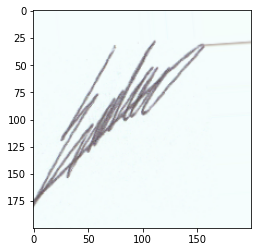

In [33]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


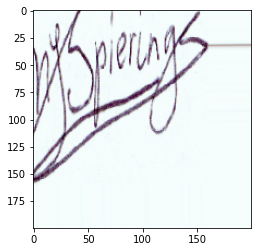

In [34]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [35]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    
    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
    self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
    self.flatten = tf.keras.layers.Flatten()
    
    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    
    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    
    return x

model = MyModel()

In [36]:
input_shape = (None, 200, 200, 3)
model.build(input_shape)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  448       
                                                                 
 conv2d_1 (Conv2D)           multiple                  4640      
                                                                 
 conv2d_2 (Conv2D)           multiple                  4624      
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  308314624 
                                                                 
 dense_1 (Dense)             multiple                  513       
                                                                 
Total params: 308,324,849
Trainable params: 308,324,849
No

In [37]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [43]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=40,
    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/40
25/25 - 24s - loss: 0.3226 - acc: 0.8669 - 24s/epoch - 954ms/step
Epoch 2/40
25/25 - 24s - loss: 0.3231 - acc: 0.8637 - 24s/epoch - 945ms/step
Epoch 3/40
25/25 - 23s - loss: 0.3024 - acc: 0.8845 - 23s/epoch - 915ms/step
Epoch 4/40
25/25 - 23s - loss: 0.3127 - acc: 0.8688 - 23s/epoch - 912ms/step
Epoch 5/40
25/25 - 23s - loss: 0.3000 - acc: 0.8883 - 23s/epoch - 915ms/step
Epoch 6/40
25/25 - 23s - loss: 0.3061 - acc: 0.8776 - 23s/epoch - 925ms/step
Epoch 7/40
25/25 - 23s - loss: 0.2936 - acc: 0.8801 - 23s/epoch - 924ms/step
Epoch 8/40
25/25 - 23s - loss: 0.2921 - acc: 0.8808 - 23s/epoch - 924ms/step
Epoch 9/40
25/25 - 23s - loss: 0.2896 - acc: 0.8858 - 23s/epoch - 928ms/step
Epoch 10/40
25/25 - 23s - loss: 0.3035 - acc: 0.8757 - 23s/epoch - 935ms/step
Epoch 11/40
25/25 - 23s - loss: 0.2919 - acc: 0.8852 - 23s/epoch - 927ms/step
Epoch 12/40
25/25 - 23s - loss: 0.2864 - acc: 0.8795 - 23s/epoch - 922ms/step
Epoch 13/40
25/25 - 23s - loss: 0.2861 - acc: 0.8877 - 23s/epoch - 912ms/

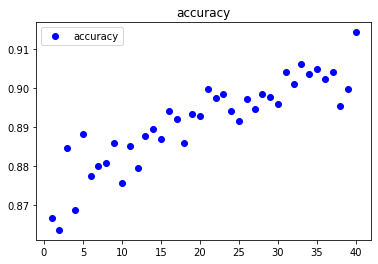

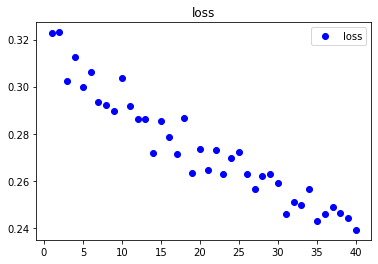

In [44]:
acc = history.history["acc"]
loss = history.history["loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="accuracy")
plt.title("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="loss")
plt.title("loss")
plt.legend()
plt.show()

In [45]:
model.evaluate(test_generator)

8/8 [==============================] - 2s 261ms/step - loss: 0.1862 - acc: 0.9460


[0.18617656826972961, 0.9459999799728394]

Label :  1.0
Predict :  1.0


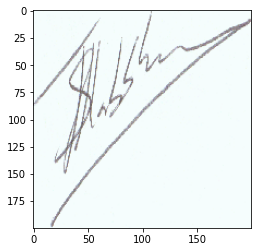

In [46]:
plt.imshow(test_generator[0][0][5])
print("Label : ",test_generator[0][1][5])

test_input = test_generator[0][0][5]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  0.0
Predict :  0.0


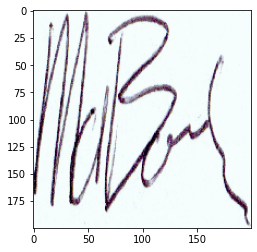

In [42]:
plt.imshow(test_generator[0][0][30])
print("Label : ",test_generator[0][1][30])

test_input = test_generator[0][0][30]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
else:
    pred = 0

print("Predict : ",float(pred))